# AAI614: Data Science & its Applications

*Notebook 7.2: Accelerating Data Science*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%207/Notebook7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: Data Science with Python and Dask

### Examining the Metadata of Dask Objects

You would need for this lab to downlaod the data and store on your local disk as it is arond 2GB with 42.3M Rows of Parking Ticket Data.  The data can be downloaded from [Kaggle](http://www.kaggle.com/new-york-city/nyc-parking-tickets/)

In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt
import kagglehub

path = kagglehub.dataset_download("new-york-city/nyc-parking-tickets")
print("Path to dataset files:", path)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


100%|██████████| 2.02G/2.02G [01:42<00:00, 21.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/new-york-city/nyc-parking-tickets/versions/2


In [5]:
import dask.dataframe as dd
df = dd.read_csv(path + '/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=32,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,string,int64,string,string,string,int64,int64,int64,int64,float64,int64,int64,int64,string,string,string,float64,string,string,float64,string,string,int64,int64,string,string,string,string,string,string,float64,int64,string,int64,string,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [12]:
reduced_df = df.head(200)

In [13]:
missing_values = reduced_df.isnull().sum()
missing_values

,0
Summons Number,0
Plate ID,0
Registration State,0
Plate Type,0
Issue Date,0
Violation Code,0
Vehicle Body Type,0
Vehicle Make,0
Issuing Agency,0
Street Code1,0


In [14]:
missing_count = ((missing_values / reduced_df.index.size) * 100)
missing_count

,0
Summons Number,0.0
Plate ID,0.0
Registration State,0.0
Plate Type,0.0
Issue Date,0.0
Violation Code,0.0
Vehicle Body Type,0.0
Vehicle Make,0.0
Issuing Agency,0.0
Street Code1,0.0


### Running Computations with the Compute Method

In [17]:
reduced_df
with ProgressBar():
    missing_count_pct = missing_count
missing_count_pct

,0
Summons Number,0.0
Plate ID,0.0
Registration State,0.0
Plate Type,0.0
Issue Date,0.0
Violation Code,0.0
Vehicle Body Type,0.0
Vehicle Make,0.0
Issuing Agency,0.0
Street Code1,0.0


In [20]:
columns_to_drop = missing_count_pct[missing_count_pct > 60].index
with ProgressBar():
     df_dropped = dd.from_pandas(reduced_df, npartitions=1).drop(columns_to_drop, axis=1).persist()

[########################################] | 100% Completed | 101.98 ms


### Visualizing a Simple DAG using Dask Delayed Objects

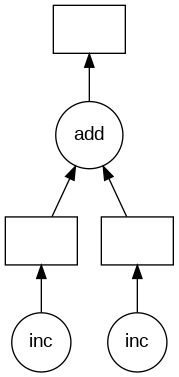

In [21]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Visualizing More Complex DAGs with Loops and Collections

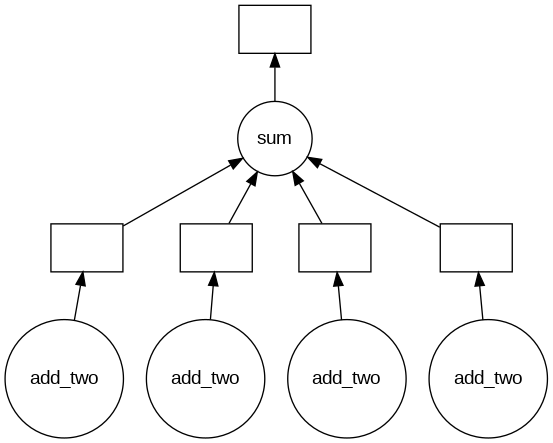

In [22]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

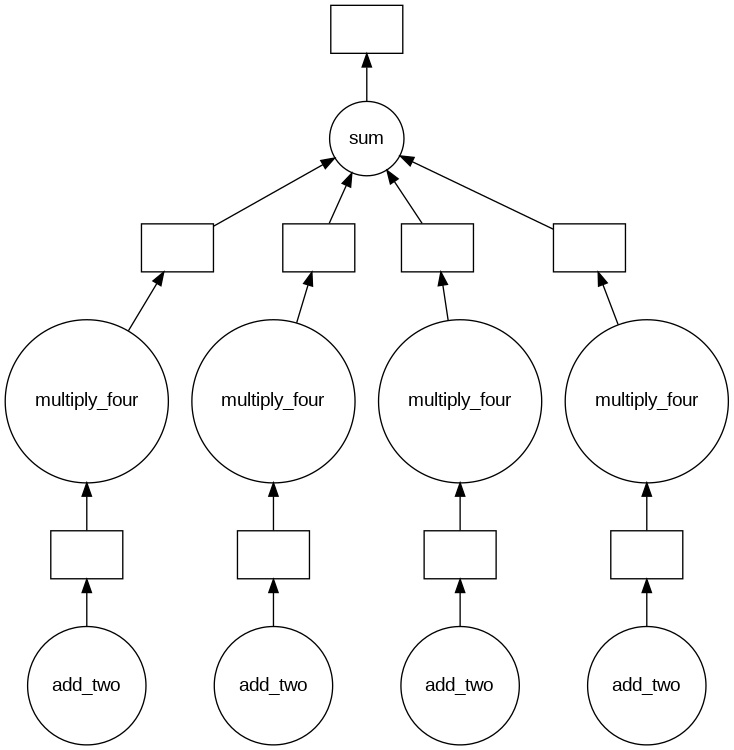

In [23]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

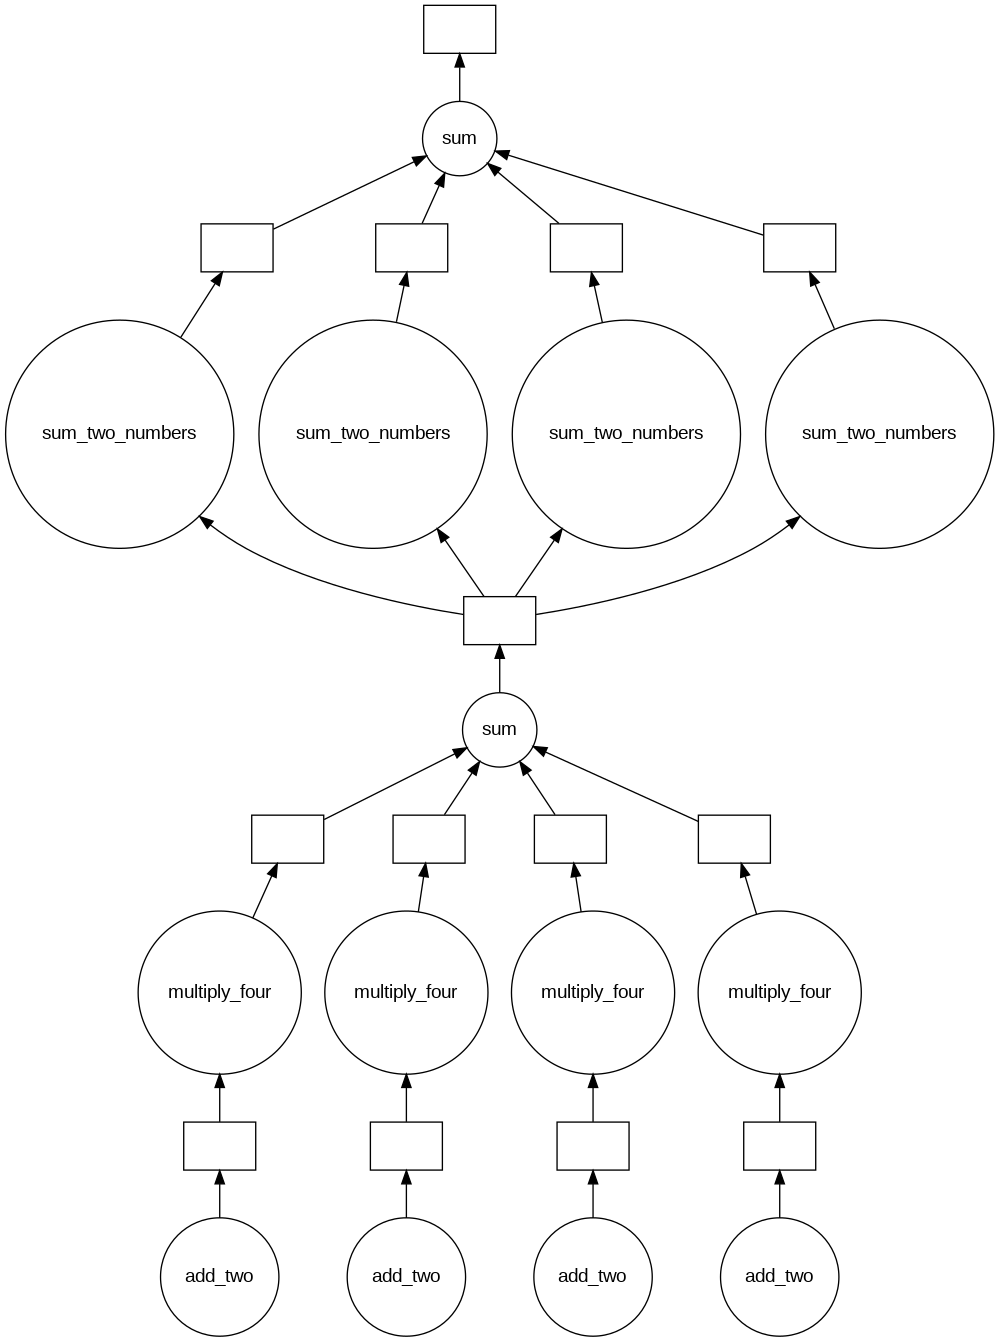

In [24]:
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

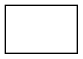

In [25]:
total_persisted = total.persist()
total_persisted.visualize()

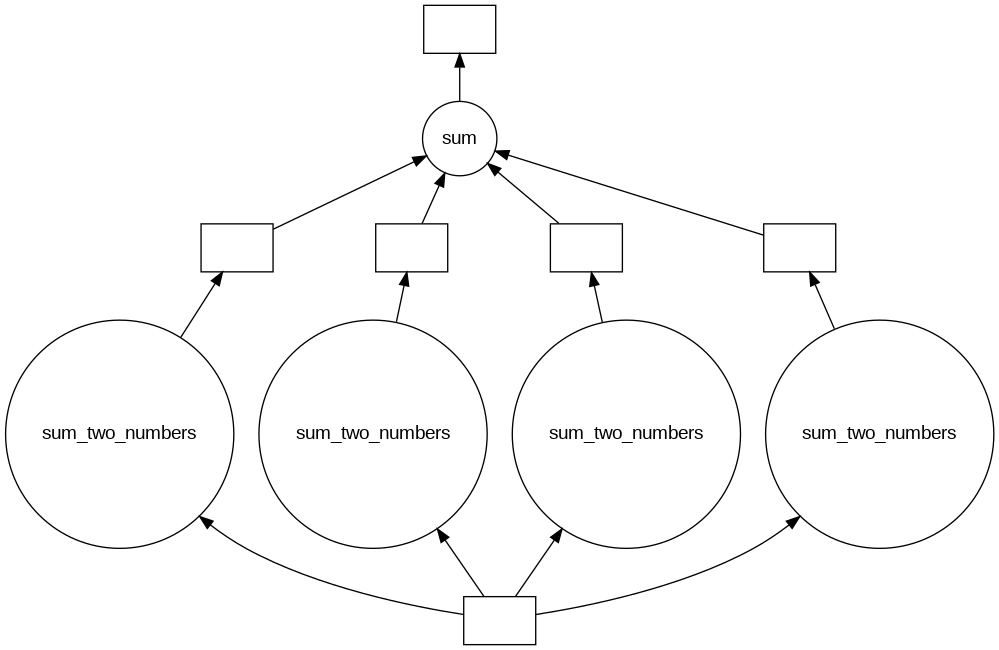

In [26]:
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

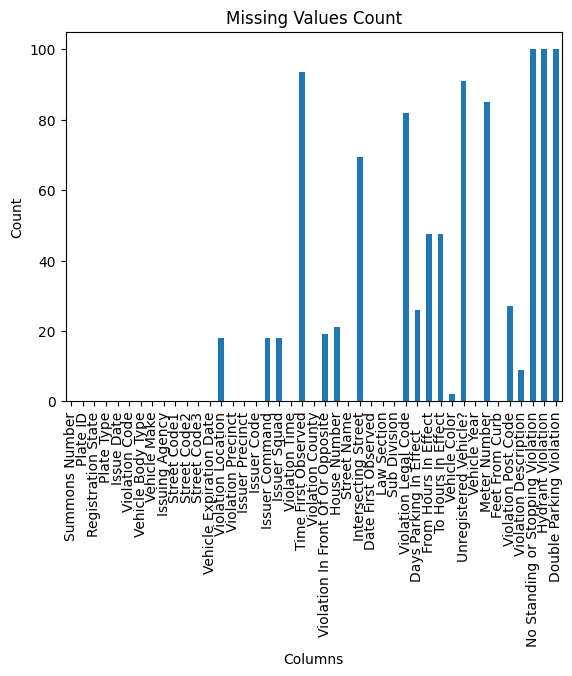

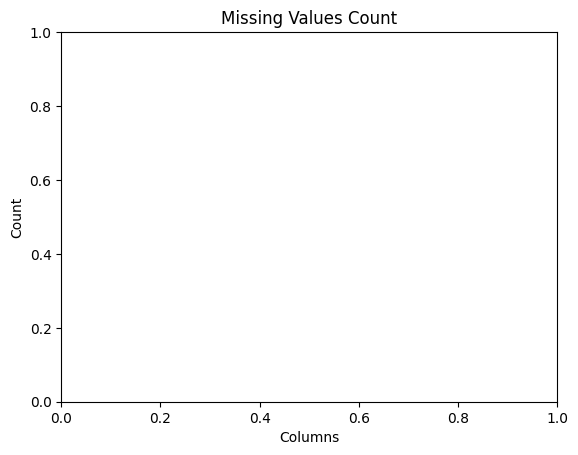

In [29]:
import matplotlib.pyplot as plt

missing_count.plot(kind='bar')
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

The NYC Parking Tickets dataset, it demonstrates how Dask handles data too large to fit into memory by leveraging distributed computing capabilities.

The integration of Dask's diagnostics tools and DAG visualizations helps understand the computational workflow.

The examples of delayed objects and DAGs illustrate how Dask executes computations. These visualizations show task dependencies and execution order, making the framework’s inner workings more transparent.